In [1]:
import re

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
def read_rick_timings(filename):
    lpg = re.search('lpg', filename)
    df = pd.read_csv(filename, sep=' ', skiprows=(0, 1))
    if lpg is not None:
        df.columns = ['problem_index', 'total_time', 'search_time']
    else:
        df.columns = ['problem_index', 'total_time']
    return df

# LPG

In [4]:
repair_df = read_rick_timings('lpg_openstacks_repair_timesbox.dat')

In [5]:
replan_df = read_rick_timings('lpg_openstacks_replan_timesbox.dat')

In [6]:
max(repair_df.total_time.max(), replan_df.total_time.max())

1203.91

In [7]:
max(repair_df.problem_index.max(), replan_df.problem_index.max())

30

In [8]:
concatenated = pd.concat([repair_df.assign(dataset='repair'), replan_df.assign(dataset='replan')])

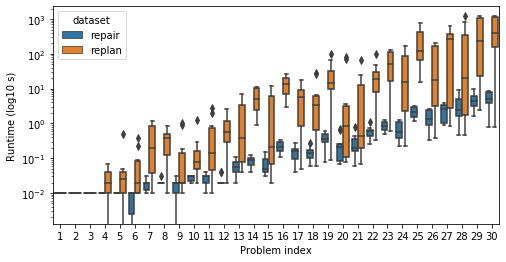

In [9]:
bp = sns.boxplot(x='problem_index', y='total_time', data=concatenated, hue='dataset')
bp.set_yscale('log')
bp.set_xlabel('Problem index')
bp.set_ylabel('Runtime (log10 s)')
bp.figure.set_size_inches(8, 4)

In [10]:
bp.figure.savefig('LPG_openstacks_repair_vs_replan.pdf', format='pdf')

# SHOP

In [12]:
shop_repair_df = read_rick_timings('shop2_openstacks_repair_timesbox.dat')
shop_repair_df.head(n=5)

problem_index  total_time
0              1       0.021
1              1       0.020
2              1       0.018
3              1       0.019
4              1       0.021

In [13]:
shop_replan_df = read_rick_timings('shop2_openstacks_replan_timesbox.dat')
shop_replan_df.head(n=5)

problem_index  total_time
0              1       0.045
1              1       0.045
2              1       0.049
3              1       0.044
4              1       0.048

In [14]:
max(shop_repair_df.total_time.max(), shop_replan_df.total_time.max())

128.825

In [15]:
max(shop_repair_df.problem_index.max(), shop_replan_df.problem_index.max())

30

In [16]:
shop_concatenated = pd.concat([shop_repair_df.assign(dataset='repair'), shop_replan_df.assign(dataset='replan')])

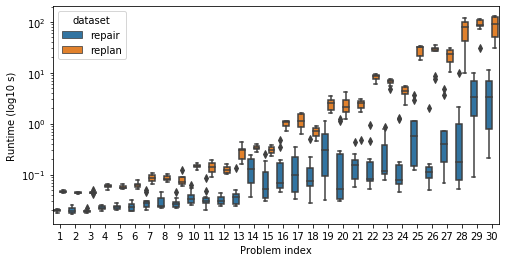

In [17]:
bp = sns.boxplot(x='problem_index', y='total_time', data=shop_concatenated, hue='dataset')
bp.set_yscale('log')
bp.set_xlabel('Problem index')
bp.set_ylabel('Runtime (log10 s)')
bp.figure.set_size_inches(8, 4)

In [18]:
bp.figure.savefig('SHOP_openstacks_shop_repairvs_replan.pdf', format='pdf')

# Plot together

In [21]:
all_concatenated = pd.concat([repair_df[['problem_index', 'total_time']].assign(dataset='LPG repair'), 
                              replan_df[['problem_index', 'total_time']].assign(dataset='LPG replan'),
                              shop_repair_df.assign(dataset='SHOP repair'), 
                              shop_replan_df.assign(dataset='SHOP replan')])

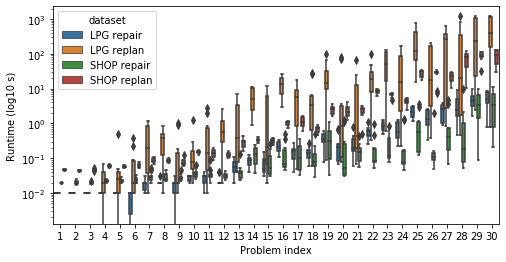

In [22]:
bp = sns.boxplot(x='problem_index', y='total_time', data=all_concatenated, hue='dataset')
bp.set_yscale('log')
bp.set_xlabel('Problem index')
bp.set_ylabel('Runtime (log10 s)')
bp.figure.set_size_inches(8, 4)